In [2329]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import sklearn
import seaborn as sns
from sklearn import linear_model

In [2330]:
from IPython.display import HTML

HTML('''<script>
code_show=true;
function code_toggle() {
if (code_show){
$('div.input').hide();
} else {
$('div.input').show();
}
code_show = !code_show
}
$( document ).ready(code_toggle);
</script>
The code for this notebook is hidden for easier reading.
To toggle it on/off, please click <a href="javascript:code_toggle()">here</a>.''')

# Cleaning

**I created a dataframe to hold the following features and the target variable - property crime:** 
-  'population' (Continuous)
-  'population_squared' (Continuous)
-  'murder' (Categorical)
-  'robbery' (Categorical)

In [2331]:
path = 'https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/New_York_offenses/NEW_YORK-Offenses_Known_to_Law_Enforcement_by_City_2013%20-%2013tbl8ny.csv'
crime = pd.read_csv(path)

In [2332]:
pd.options.mode.chained_assignment = None

crime.columns = ['city','population','violent_crime','murder','rape_revised','rape_legacy','robbery','aggravated_assault','property_crime','burglary','larceny_theft','vehicle_theft','arson']
crime.drop(labels=[0,1,2,3,352,353,354],axis=0,inplace=True)

pcmodel = crime[['murder','population','property_crime','robbery']]
columns = list(pcmodel.columns)
for column in columns:
    pcmodel[column]=pcmodel[column].str.replace(',','')
pcmodel = pcmodel.apply(pd.to_numeric)

pcmodel['population_squared']=pcmodel['population']**2
pcmodel['murder']=pcmodel['murder'].apply(lambda x: 0 if x <= 0 else 1).astype('int64')
pcmodel['robbery']=pcmodel['robbery'].apply(lambda x: 0 if x <= 0 else 1).astype('int64')
pcmodel.head()

,murder,population,property_crime,robbery,population_squared
4,0,1861,12,0,3463321
5,0,2577,24,0,6640929
6,0,2846,16,0,8099716
7,1,97956,4090,1,9595377936
8,0,6388,223,1,40806544


In [2333]:
pcmodel.describe()

,murder,population,property_crime,robbery,population_squared
count,348.000000,3.480000e+02,348.000000,348.000000,3.480000e+02
mean,0.140805,4.003763e+04,792.606322,0.600575,2.035547e+11
std,0.348321,4.500374e+05,7659.724746,0.490486,3.778876e+12
min,0.000000,5.260000e+02,0.000000,0.000000,2.766760e+05
25%,0.000000,3.003000e+03,40.500000,0.000000,9.018117e+06
50%,0.000000,7.233500e+03,112.500000,1.000000,5.232568e+07
75%,0.000000,1.842750e+04,341.000000,1.000000,3.397536e+08
max,1.000000,8.396126e+06,141971.000000,1.000000,7.049493e+13


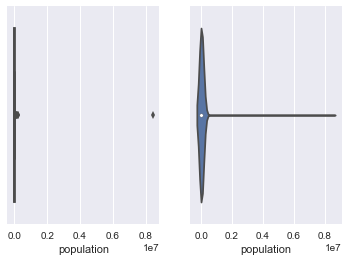

In [2334]:
plt.subplot(121)
population = sns.boxplot(pcmodel['population'])
plt.subplot(122)
population = sns.violinplot(pcmodel['population'])

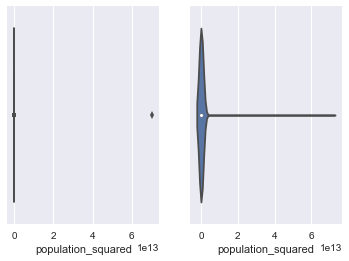

In [2335]:
plt.subplot(121)
population_squared = sns.boxplot(pcmodel['population_squared'])
plt.subplot(122)
population = sns.violinplot(pcmodel['population_squared'])

**There are extreme outliers (much more densely populated cities) beyond Q3+1.5IQR that I chose to exclude.**

In [2336]:
columns = list(pcmodel[['population','population_squared']].columns)
for column in columns: 
    q25 = pcmodel[column].quantile(0.25)
    q75 = pcmodel[column].quantile(0.75)
    iqr = q75 - q25
    max = q75 + (iqr * 1.5)
    pcmodel=pcmodel.where(pcmodel[column] < max)

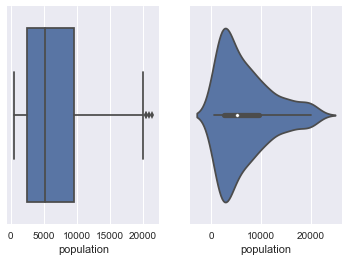

In [2337]:
plt.subplot(121)
population = sns.boxplot(pcmodel['population'])
plt.subplot(122)
population = sns.violinplot(pcmodel['population'])

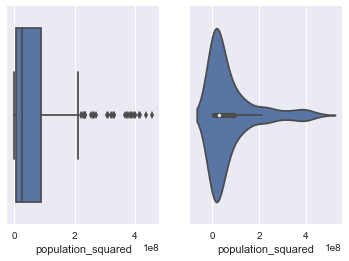

In [2338]:
plt.subplot(121)
population_squared = sns.boxplot(pcmodel['population_squared'])
plt.subplot(122)
population_squared = sns.violinplot(pcmodel['population_squared'])

In [2339]:
pcmodel.describe()

,murder,population,property_crime,robbery,population_squared
count,274.000000,274.000000,274.000000,274.000000,2.740000e+02
mean,0.051095,6730.492701,130.014599,0.500000,7.301594e+07
std,0.220594,5274.271168,151.249060,0.500915,1.039372e+08
min,0.000000,526.000000,0.000000,0.000000,2.766760e+05
25%,0.000000,2467.750000,31.000000,0.000000,6.089970e+06
50%,0.000000,5133.500000,73.500000,0.500000,2.635293e+07
75%,0.000000,9517.000000,171.000000,1.000000,9.057329e+07
max,1.000000,21397.000000,949.000000,1.000000,4.578316e+08


# Initial Model

In [2340]:
pcmodel.dropna(axis=0,how='all',inplace=True)
Y = pcmodel['property_crime']
X = pcmodel[['population','population_squared','murder','robbery']]

In [2341]:
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-Squared:')
print(regr.score(X, Y))


Coefficients: 
 [  1.18902035e-02   1.52184341e-07   6.76296273e+01   9.04003946e+01]

Intercept: 
 -9.77993807067

R-Squared:
0.540551119067


# Checking Assumptions

## Linear Relationship

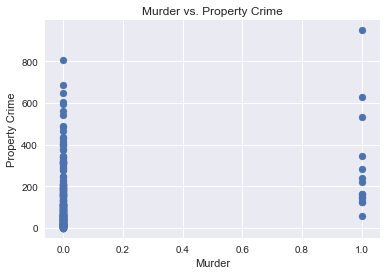

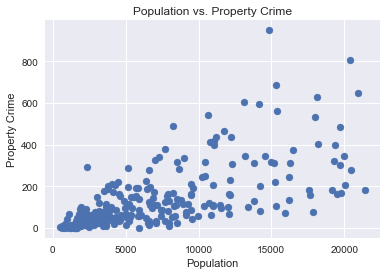

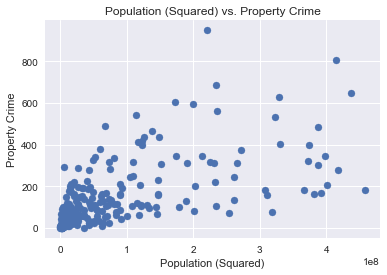

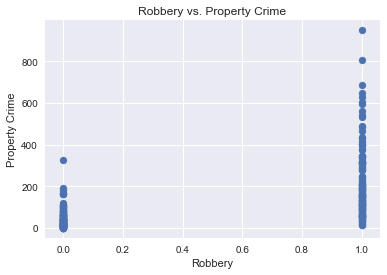

In [2342]:
plt.scatter(y=pcmodel['property_crime'], x=pcmodel['murder'])
plt.ylabel('Property Crime')
plt.xlabel('Murder')
plt.title('Murder vs. Property Crime')
plt.show()

plt.scatter(y=pcmodel['property_crime'], x=pcmodel['population'])
plt.ylabel('Property Crime')
plt.xlabel('Population')
plt.title('Population vs. Property Crime')
plt.show()

plt.scatter(y=pcmodel['property_crime'], x=pcmodel['population_squared'])
plt.ylabel('Property Crime')
plt.xlabel('Population (Squared)')
plt.title('Population (Squared) vs. Property Crime')
plt.show()

plt.scatter(y=pcmodel['property_crime'], x=pcmodel['robbery'])
plt.ylabel('Property Crime')
plt.xlabel('Robbery')
plt.title('Robbery vs. Property Crime')
plt.show()

**The target 'property crime' seems to be less related to the features 'murder' and 'population_squared'.**

## Multivariate Normality

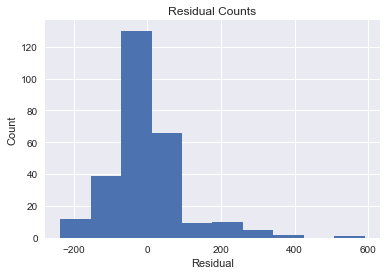

In [2343]:
predicted = regr.predict(X).ravel()
actual = Y
residual = actual - predicted

plt.hist(residual)
plt.title('Residual Counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

**The model's error is approximately normal.**

## Homoscedasticity

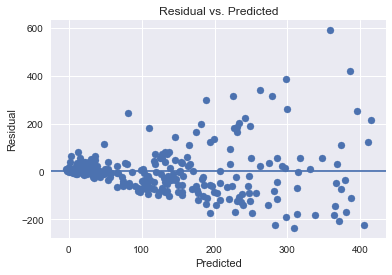

In [2344]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

**The error terms are heteroscedastic.**

## Low Multicollinearity

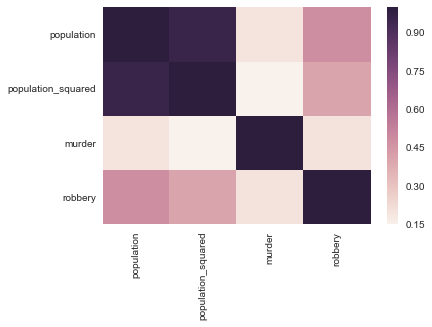

In [2345]:
correlation_matrix = X.corr()
multicollinearity = sns.heatmap(correlation_matrix)
ticks = plt.xticks(rotation=90) 

**The feature 'population and its derivative 'population_squared' are highly correlated.**

# Feature Engineering

**Decisions:**
-  Added 'burglary'
-  Added 'larceny_theft'
-  Added 'vehicle_theft'
-  Dropped 'population_squared'

In [2346]:
pcmodel[['burglary','larceny_theft','vehicle_theft']]=crime[['burglary','larceny_theft','vehicle_theft']]
pcmodel.drop(labels=['population_squared'], axis=1, inplace=True)

In [2347]:
pcmodel.dropna(axis=0,how='all',inplace=True)
pcmodel = pcmodel.apply(pd.to_numeric)
pcmodel['burglary']=pcmodel['burglary'].apply(lambda x: 0 if x <= 0 else 1)
pcmodel['larceny_theft']=pcmodel['larceny_theft'].apply(lambda x: 0 if x <= 0 else 1)
pcmodel['vehicle_theft']=pcmodel['vehicle_theft'].apply(lambda x: 0 if x <= 0 else 1)
pcmodel.apply(pd.to_numeric)
pcmodel.head()

,murder,population,property_crime,robbery,burglary,larceny_theft,vehicle_theft
4,0.0,1861.0,12.0,0.0,1,1,0
5,0.0,2577.0,24.0,0.0,1,1,1
6,0.0,2846.0,16.0,0.0,1,1,0
8,0.0,6388.0,223.0,1.0,1,1,1
9,0.0,4089.0,46.0,1.0,1,1,0


# Re-Checking Assumptions

## Linear Relationship

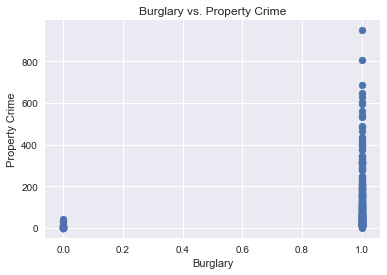

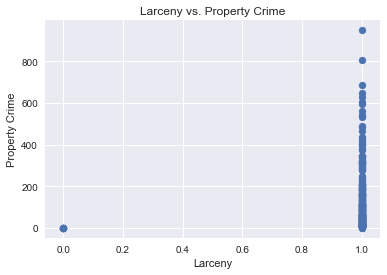

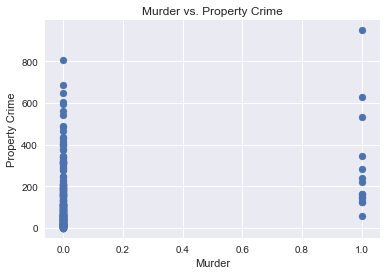

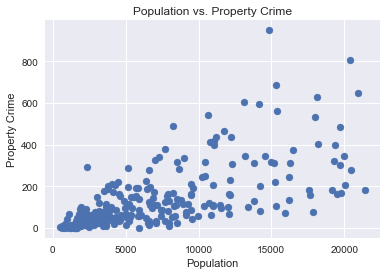

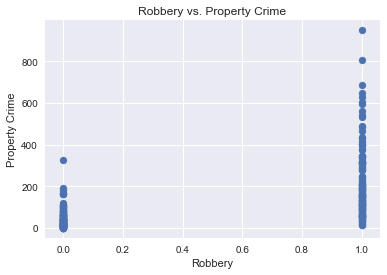

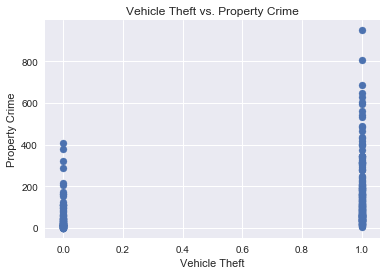

In [2348]:
plt.scatter(y=pcmodel['property_crime'], x=pcmodel['burglary'])
plt.ylabel('Property Crime')
plt.xlabel('Burglary')
plt.title('Burglary vs. Property Crime')
plt.show()

plt.scatter(y=pcmodel['property_crime'], x=pcmodel['larceny_theft'])
plt.ylabel('Property Crime')
plt.xlabel('Larceny')
plt.title('Larceny vs. Property Crime')
plt.show()

plt.scatter(y=pcmodel['property_crime'], x=pcmodel['murder'])
plt.ylabel('Property Crime')
plt.xlabel('Murder')
plt.title('Murder vs. Property Crime')
plt.show()

plt.scatter(y=pcmodel['property_crime'], x=pcmodel['population'])
plt.ylabel('Property Crime')
plt.xlabel('Population')
plt.title('Population vs. Property Crime')
plt.show()

plt.scatter(y=pcmodel['property_crime'], x=pcmodel['robbery'])
plt.ylabel('Property Crime')
plt.xlabel('Robbery')
plt.title('Robbery vs. Property Crime')
plt.show()

plt.scatter(y=pcmodel['property_crime'], x=pcmodel['vehicle_theft'])
plt.ylabel('Property Crime')
plt.xlabel('Vehicle Theft')
plt.title('Vehicle Theft vs. Property Crime')
plt.show()

**Aside from 'murder', there's a sufficiently linear relationship between these features and the target.**

## Multivariate Normality

In [2349]:
Y = pcmodel['property_crime']
X = pcmodel[['burglary','larceny_theft','murder','population','robbery','vehicle_theft']]

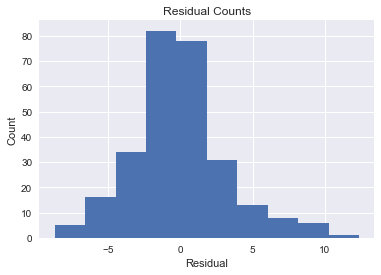

In [2356]:
predicted = regr.predict(X).ravel()
actual = Y
residual = actual - predicted

plt.hist(residual)
plt.title('Residual Counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

**The model's error is still approximately normally distributed.**

## Homoscedasticity

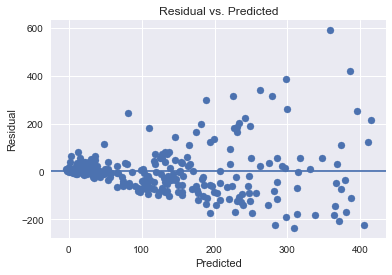

In [2351]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

**The error terms are still heteroscedastic. I transformed the dependent variable attempting to address it.**

In [2352]:
Y=np.sqrt(Y)

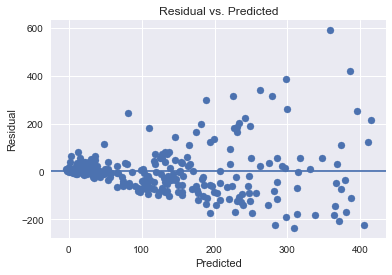

In [2353]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

## Low Multicollinearity 

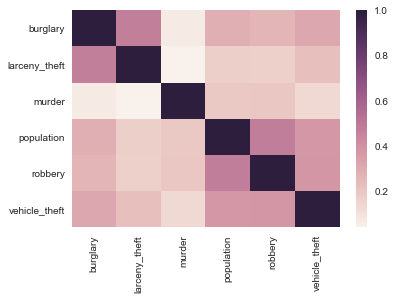

In [2354]:
correlation_matrix = X.corr()
multicollinearity = sns.heatmap(correlation_matrix)
ticks = plt.xticks(rotation=90) 

**There are moderate interactions between 'burglary' and larceny_theft' and 'population' and 'robbery'.**

# Revised Model 

In [2355]:
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-Squared:')
print(regr.score(X, Y))


Coefficients: 
 [  1.90148844e+00   2.40413047e+00   1.78263448e+00   5.33265461e-04
   4.00982803e+00   1.21552676e+00]

Intercept: 
 -0.819058111285

R-Squared:
0.679072235091
